In [4]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [5]:
# Define the topics and their characteristics
topics = [
    "Math - Algebra", "Math - Geometry", "Physics - Mechanics",
    "Chemistry - Organic", "Biology - Genetics", "Computer Science - Algorithms",
    "History - World Wars", "Literature - Shakespeare", "Geography - Europe",
    "Psychology - Cognitive Science"
]

# Generate synthetic learner data
num_learners = 500  # Number of learners
learner_data = []

for learner_id in range(1, num_learners + 1):
    for topic in topics:
        score = random.randint(0, 10)  # Random score between 0 and 10 for each topic
        learner_data.append([learner_id, topic, score])

# Create the DataFrame
learner_df = pd.DataFrame(learner_data, columns=["learner_id", "topic", "score"])

# Show the first few rows of the synthetic data
learner_df.head()


,learner_id,topic,score
0,1,Math - Algebra,6
1,1,Math - Geometry,3
2,1,Physics - Mechanics,9
3,1,Chemistry - Organic,7
4,1,Biology - Genetics,9


In [6]:
# Split the data into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(learner_df, test_size=0.2, random_state=42)

print(f"Training Data Size: {train_data.shape}")
print(f"Testing Data Size: {test_data.shape}")


Training Data Size: (4000, 3)
Testing Data Size: (1000, 3)


In [7]:
# Create a pivot table for learner-topic matrix
learner_topic_matrix = learner_df.pivot_table(index="learner_id", columns="topic", values="score", fill_value=0)

# Show the learner-topic matrix
learner_topic_matrix.head()


topic,Biology - Genetics,Chemistry - Organic,Computer Science - Algorithms,Geography - Europe,History - World Wars,Literature - Shakespeare,Math - Algebra,Math - Geometry,Physics - Mechanics,Psychology - Cognitive Science
learner_id,,,,,,,,,,
1,9.0,7.0,3.0,4.0,10.0,6.0,6.0,3.0,9.0,8.0
2,1.0,8.0,6.0,3.0,0.0,6.0,8.0,8.0,10.0,4.0
3,6.0,1.0,0.0,4.0,9.0,5.0,6.0,9.0,2.0,8.0
4,5.0,2.0,4.0,9.0,9.0,4.0,7.0,9.0,9.0,1.0
5,2.0,3.0,0.0,3.0,1.0,0.0,10.0,2.0,10.0,2.0


In [19]:
# Normalize the data to scale between 0 and 1 for cosine similarity computation
scaler = MinMaxScaler()
learner_topic_matrix_scaled = scaler.fit_transform(learner_topic_matrix)

# Show the scaled matrix
pd.DataFrame(learner_topic_matrix_scaled, columns=learner_topic_matrix.columns).head()


topic,Biology - Genetics,Chemistry - Organic,Computer Science - Algorithms,Geography - Europe,History - World Wars,Literature - Shakespeare,Math - Algebra,Math - Geometry,Physics - Mechanics,Psychology - Cognitive Science
0,0.9,0.7,0.0,0.0,1.0,0.6,0.6,0.0,0.9,0.8
1,0.1,0.8,0.6,0.3,0.0,0.6,0.8,0.8,1.0,0.4
2,0.6,0.1,0.0,0.4,0.9,0.5,0.6,0.9,0.2,0.8
3,0.5,0.2,0.4,0.9,0.9,0.4,0.7,0.9,0.9,0.1
4,0.2,0.3,0.0,0.3,0.1,0.0,1.0,0.2,1.0,0.2


In [9]:
# Compute cosine similarity between learners (learners who have similar scores on topics)
cosine_sim = cosine_similarity(learner_topic_matrix_scaled)

# Show similarity scores for the first learner
learner_1_similar = cosine_sim[0]
print("Cosine Similarity for Learner 1 with others:\n", learner_1_similar)


Cosine Similarity for Learner 1 with others:
 [1.         0.75037528 0.84076446 0.82855634 0.69900035 0.76040822
 0.81045699 0.82865233 0.83946338 0.82974155 0.84029277 0.94640661
 0.80361379 0.79508156 0.7630072  0.84951343 0.8119281  0.83598916
 0.77410708 0.80264819 0.78748951 0.86589908 0.65302927 0.78446454
 0.75346278 0.96947602 0.85626791 0.86725859 0.78397178 0.85394529
 0.91653447 0.84998544 0.76634342 0.90861324 0.83755765 0.89547057
 0.79508156 0.70588522 0.84533556 0.83848852 0.87585935 0.90454192
 0.82079039 0.85330658 0.81461577 0.84267464 0.66214488 0.81131777
 0.93682997 0.80020787 0.82424119 0.79703443 0.79131797 0.82952405
 0.72189148 0.88782304 0.85953544 0.76525256 0.83976982 0.85555946
 0.70302076 0.77397032 0.91400293 0.77833187 0.60535667 0.86395298
 0.6809546  0.75643036 0.70134825 0.84370057 0.82598564 0.66689763
 0.84584944 0.7199075  0.77954038 0.75693595 0.86047813 0.75614566
 0.91770708 0.87330983 0.77150693 0.74703459 0.87263027 0.76344131
 0.8619235  0.87

In [12]:
class ContentRecommendationSystem:
    def __init__(self, learner_topic_matrix):
        self.learner_topic_matrix = learner_topic_matrix

    def recommend(self, learner_id):
        """
        Recommend topics to a learner based on their progress (scores).
        """
        # Get the scores for the learner
        learner_scores = self.learner_topic_matrix.loc[learner_id].values

        # Compute similarity for each topic
        similarities = cosine_similarity([learner_scores], self.learner_topic_matrix)

        # Get the most similar learners to the current learner (excluding the learner itself)
        similar_learners = similarities[0].argsort()[::-1][1:]  # Skip the first one as it's the learner itself

        # Collect topics for recommendation
        recommended_topics = []
        for learner_idx in similar_learners:
            # Find topics that this similar learner has high scores but the current learner has low scores
            similar_learner_scores = self.learner_topic_matrix.iloc[learner_idx].values
            for idx, score in enumerate(similar_learner_scores):
                if learner_scores[idx] < 7 and score > 7:  # Recommend if current learner's score < 7 and similar learner's score > 7
                    recommended_topics.append(self.learner_topic_matrix.columns[idx])

        return list(set(recommended_topics))  # Remove duplicates

# Instantiate the recommendation system
recommendation_system = ContentRecommendationSystem(learner_topic_matrix)

# Get recommendations for Learner 1
recommended_topics_for_learner_1 = recommendation_system.recommend(learner_id=1)

print("Recommended Topics for Learner 1:", recommended_topics_for_learner_1)


Recommended Topics for Learner 1: ['Geography - Europe', 'Math - Geometry', 'Literature - Shakespeare', 'Computer Science - Algorithms', 'Math - Algebra']


In [14]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357286 sha256=d304edf48a7beaf806924fdee8372858a75a3b461a394479bf3545d68e247849
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [15]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare the data for the surprise library (Collaborative Filtering)
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(learner_df[['learner_id', 'topic', 'score']], reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Use SVD (Singular Value Decomposition) as the recommendation algorithm
algo = SVD()

# Train the algorithm on the training data
algo.fit(trainset)

# Make predictions and evaluate accuracy
predictions = algo.test(testset)
rmse = accuracy.rmse(predictions)

print(f"RMSE of the SVD model: {rmse}")


RMSE: 3.2442
RMSE of the SVD model: 3.244229969813349


In [16]:
class AdaptiveLearningPath:
    def __init__(self, learner_id, recommendation_system):
        self.learner_id = learner_id
        self.recommendation_system = recommendation_system

    def generate_learning_path(self):
        # Generate a personalized learning path based on the learner's progress and recommendations
        recommended_topics = self.recommendation_system.recommend(self.learner_id)
        learning_path = [{"topic": topic} for topic in recommended_topics]
        return learning_path

# Instantiate adaptive learning path for Learner 1
adaptive_path = AdaptiveLearningPath(learner_id=1, recommendation_system=recommendation_system)

# Generate learning path
learning_path_for_learner_1 = adaptive_path.generate_learning_path()
print("Learning Path for Learner 1:", learning_path_for_learner_1)


Learning Path for Learner 1: [{'topic': 'Geography - Europe'}, {'topic': 'Math - Geometry'}, {'topic': 'Literature - Shakespeare'}, {'topic': 'Computer Science - Algorithms'}, {'topic': 'Math - Algebra'}]


In [17]:
class AdaptiveLearningPathWithAdjustments:
    def __init__(self, learner_id, recommendation_system, learner_topic_matrix):
        self.learner_id = learner_id
        self.recommendation_system = recommendation_system
        self.learner_topic_matrix = learner_topic_matrix

    def adjust_learning_path(self):
        # Check learner's performance (if score is less than 5, adjust learning path)
        learner_scores = self.learner_topic_matrix.loc[self.learner_id]
        struggling_topics = learner_scores[learner_scores < 5].index.tolist()

        if struggling_topics:
            print(f"Learner {self.learner_id} is struggling with: {struggling_topics}")
            for topic in struggling_topics:
                # Reset the score to simulate further study
                learner_scores[topic] = 0
            return struggling_topics  # Suggest improvement on these topics
        else:
            return []

# Instantiate the adjusted learning path for Learner 1
adaptive_path_with_adjustments = AdaptiveLearningPathWithAdjustments(learner_id=1,
                                                                   recommendation_system=recommendation_system,
                                                                   learner_topic_matrix=learner_topic_matrix)

# Adjust the learning path based on current scores
struggling_topics = adaptive_path_with_adjustments.adjust_learning_path()
print(f"Adjusted Learning Path for Learner 1 due to struggling topics: {struggling_topics}")


Learner 1 is struggling with: ['Computer Science - Algorithms', 'Geography - Europe', 'Math - Geometry']
Adjusted Learning Path for Learner 1 due to struggling topics: ['Computer Science - Algorithms', 'Geography - Europe', 'Math - Geometry']


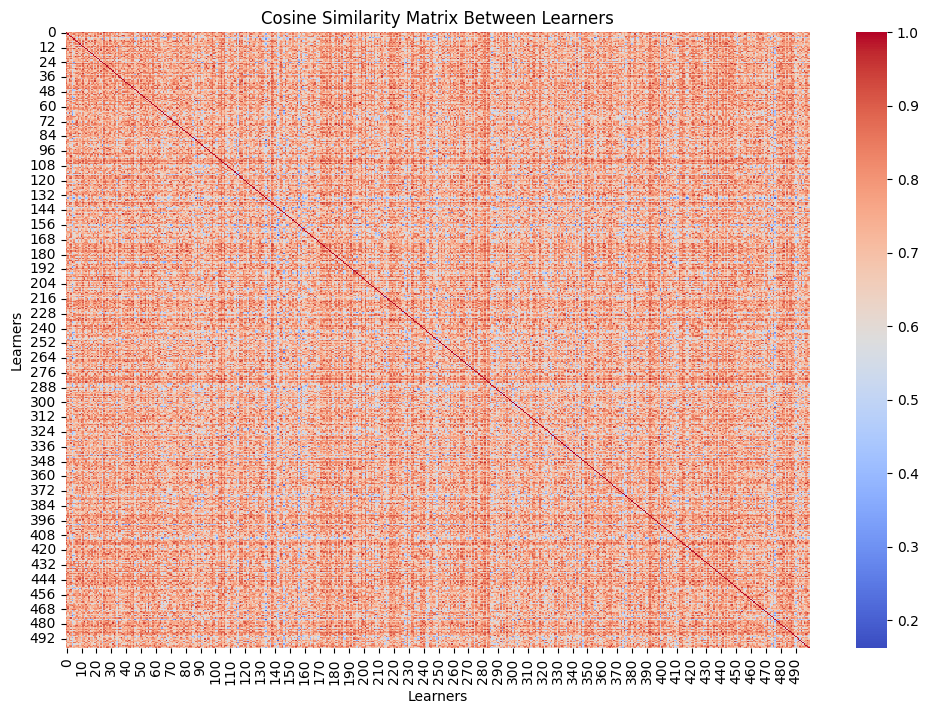

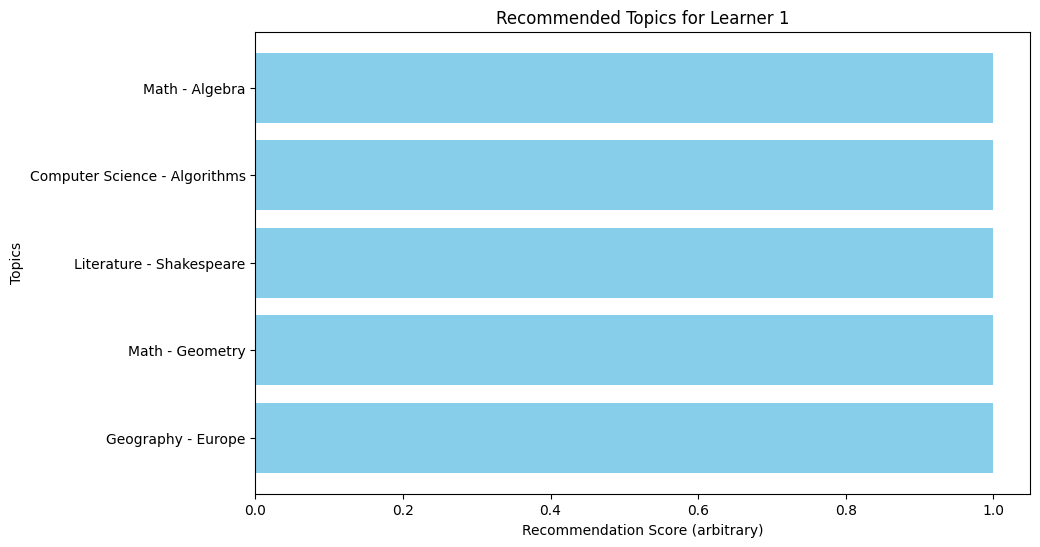

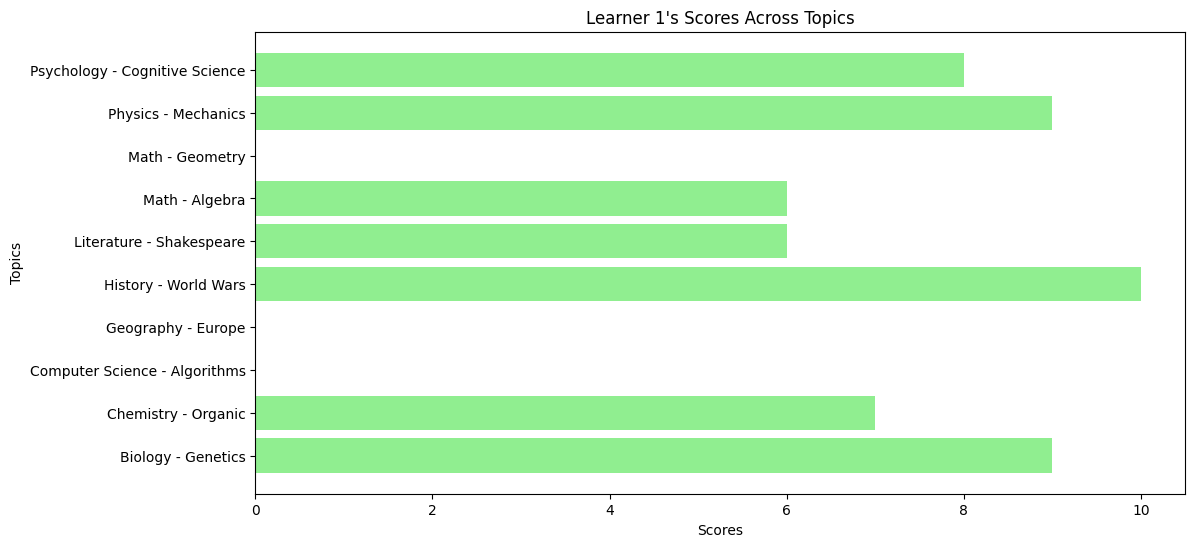

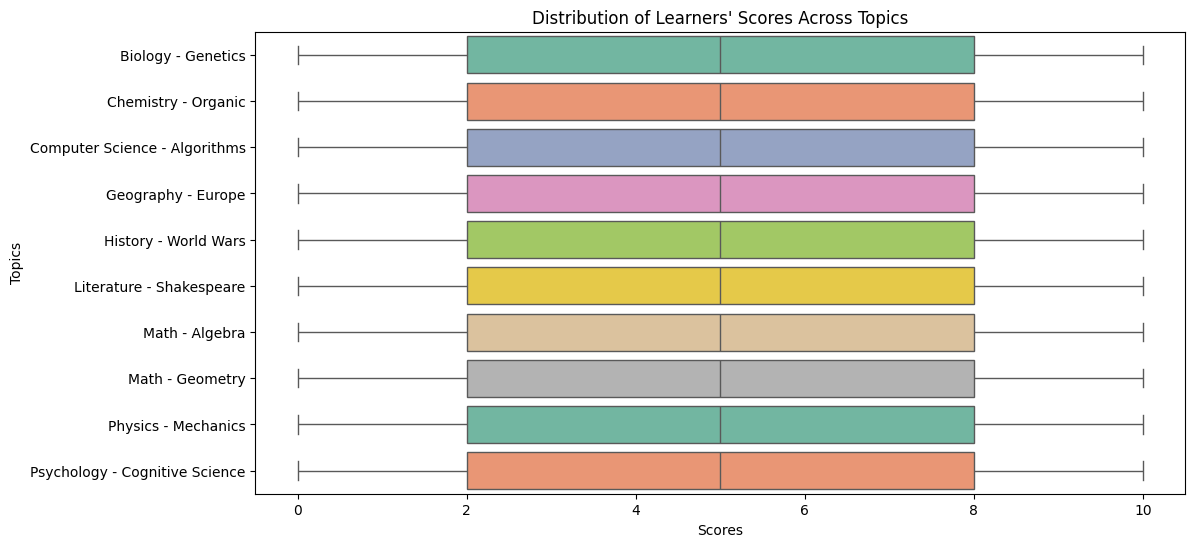

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cosine Similarity Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cosine_sim, cmap='coolwarm', annot=False, fmt=".2f", cbar=True)
plt.title("Cosine Similarity Matrix Between Learners")
plt.xlabel("Learners")
plt.ylabel("Learners")
plt.show()

# 2. Recommended Topics for Learner 1 (Bar chart)
recommended_topics_for_learner_1 = recommendation_system.recommend(learner_id=1)
plt.figure(figsize=(10, 6))
plt.barh(recommended_topics_for_learner_1, np.ones(len(recommended_topics_for_learner_1)), color='skyblue')
plt.title("Recommended Topics for Learner 1")
plt.xlabel("Recommendation Score (arbitrary)")
plt.ylabel("Topics")
plt.show()

# 3. Learner 1's Scores (Bar chart)
learner_1_scores = learner_topic_matrix.loc[1].values
plt.figure(figsize=(12, 6))
plt.barh(learner_topic_matrix.columns, learner_1_scores, color='lightgreen')
plt.title("Learner 1's Scores Across Topics")
plt.xlabel("Scores")
plt.ylabel("Topics")
plt.show()

# 4. Distribution of Learners' Scores Across Topics (Box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=learner_topic_matrix, orient='h', palette='Set2')
plt.title("Distribution of Learners' Scores Across Topics")
plt.xlabel("Scores")
plt.ylabel("Topics")
plt.show()
